In [39]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [40]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
device

# Prepare training dataset

In [41]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [42]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [43]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [44]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [45]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [46]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [47]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [48]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [49]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [50]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [51]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:42,  2.81it/s]                                                           


Epoch 1 of 100
Generator loss: 13.02570776, Discriminator loss: 0.00010822


118it [00:44,  2.64it/s]                                                           


Epoch 2 of 100
Generator loss: 13.31669809, Discriminator loss: 0.00009517


118it [00:40,  2.92it/s]                                                           


Epoch 3 of 100
Generator loss: 13.61083193, Discriminator loss: 0.00007470


118it [00:38,  3.10it/s]                                                           


Epoch 4 of 100
Generator loss: 13.26439182, Discriminator loss: 0.00009375


118it [00:41,  2.82it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


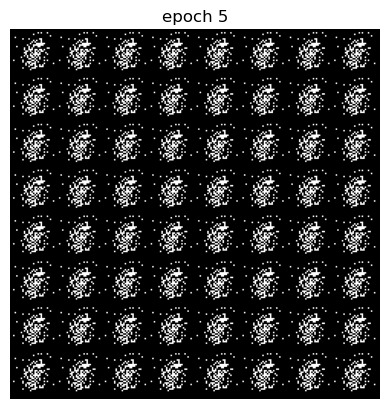

Epoch 5 of 100
Generator loss: 12.82717614, Discriminator loss: 0.00012476


118it [00:38,  3.04it/s]                                                           


Epoch 6 of 100
Generator loss: 12.32517644, Discriminator loss: 0.00020419


118it [00:38,  3.03it/s]                                                           


Epoch 7 of 100
Generator loss: 11.41072765, Discriminator loss: 0.00166809


118it [00:39,  2.98it/s]                                                           


Epoch 8 of 100
Generator loss: 12.76251246, Discriminator loss: 0.00017219


118it [00:39,  2.96it/s]                                                           


Epoch 9 of 100
Generator loss: 14.05866800, Discriminator loss: 0.00003578


118it [00:37,  3.17it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


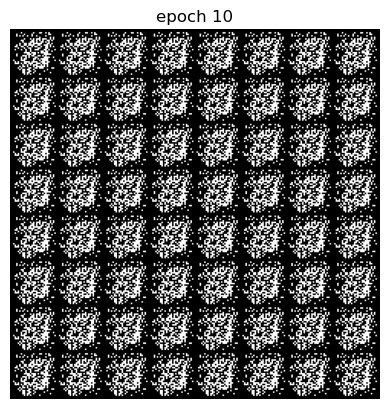

Epoch 10 of 100
Generator loss: 14.18771933, Discriminator loss: 0.00003253


118it [00:43,  2.70it/s]                                                           


Epoch 11 of 100
Generator loss: 13.89319668, Discriminator loss: 0.00002685


118it [00:36,  3.19it/s]                                                           


Epoch 12 of 100
Generator loss: 12.35945585, Discriminator loss: 0.00008597


118it [00:37,  3.17it/s]                                                           


Epoch 13 of 100
Generator loss: 12.47766653, Discriminator loss: 0.00005973


118it [00:43,  2.73it/s]                                                           


Epoch 14 of 100
Generator loss: 12.05985097, Discriminator loss: 0.00005343


118it [00:44,  2.66it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


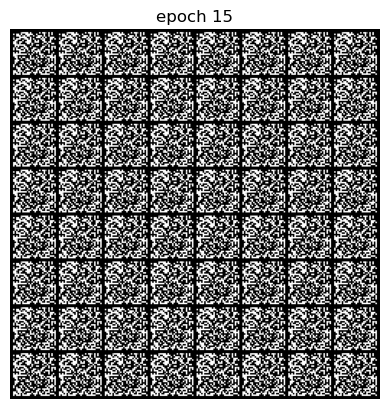

Epoch 15 of 100
Generator loss: 9.47158131, Discriminator loss: 0.00053607


118it [00:47,  2.49it/s]                                                           


Epoch 16 of 100
Generator loss: 13.43190429, Discriminator loss: 0.00629735


118it [00:35,  3.29it/s]                                                           


Epoch 17 of 100
Generator loss: 21.99010606, Discriminator loss: 0.00000069


118it [00:37,  3.11it/s]                                                           


Epoch 18 of 100
Generator loss: 19.37410907, Discriminator loss: 0.00001398


118it [00:46,  2.56it/s]                                                           


Epoch 19 of 100
Generator loss: 21.29473768, Discriminator loss: 0.00000127


118it [00:40,  2.94it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


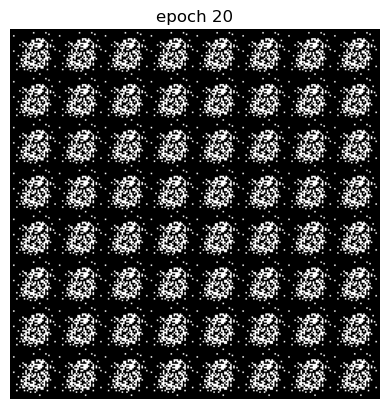

Epoch 20 of 100
Generator loss: 21.50010911, Discriminator loss: 0.00000068


118it [00:41,  2.85it/s]                                                           


Epoch 21 of 100
Generator loss: 21.49502634, Discriminator loss: 0.00000092


118it [00:43,  2.71it/s]                                                           


Epoch 22 of 100
Generator loss: 21.58775264, Discriminator loss: 0.00000039


118it [00:42,  2.80it/s]                                                           


Epoch 23 of 100
Generator loss: 21.79251219, Discriminator loss: 0.00000122


118it [00:38,  3.09it/s]                                                           


Epoch 24 of 100
Generator loss: 21.97397506, Discriminator loss: 0.00000036


118it [00:50,  2.34it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


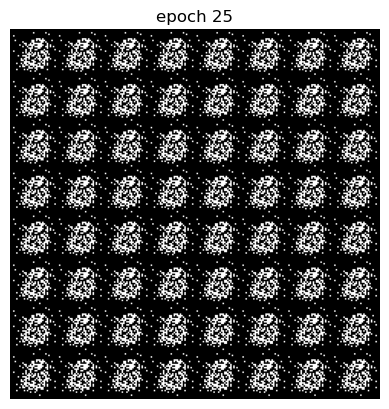

Epoch 25 of 100
Generator loss: 22.10938961, Discriminator loss: 0.00000051


118it [01:07,  1.76it/s]                                                           


Epoch 26 of 100
Generator loss: 22.04233173, Discriminator loss: 0.00000063


118it [00:54,  2.15it/s]                                                           


Epoch 27 of 100
Generator loss: 21.27336047, Discriminator loss: 0.00000083


118it [00:54,  2.16it/s]                                                           


Epoch 28 of 100
Generator loss: 21.50746644, Discriminator loss: 0.00000058


118it [00:56,  2.11it/s]                                                           


Epoch 29 of 100
Generator loss: 21.67256875, Discriminator loss: 0.00000052


118it [00:54,  2.17it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


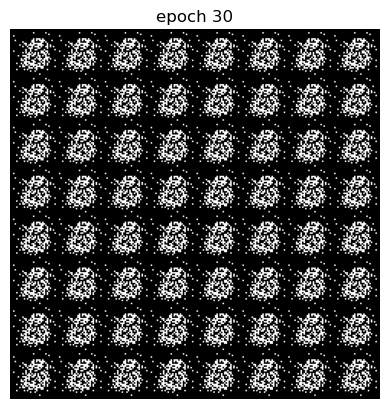

Epoch 30 of 100
Generator loss: 21.77311682, Discriminator loss: 0.00000043


118it [00:58,  2.03it/s]                                                           


Epoch 31 of 100
Generator loss: 21.91563492, Discriminator loss: 0.00000044


118it [01:14,  1.59it/s]                                                           


Epoch 32 of 100
Generator loss: 22.02904136, Discriminator loss: 0.00000047


118it [01:00,  1.94it/s]                                                           


Epoch 33 of 100
Generator loss: 22.10567872, Discriminator loss: 0.00000048


118it [00:53,  2.20it/s]                                                           


Epoch 34 of 100
Generator loss: 22.16820542, Discriminator loss: 0.00000041


118it [00:41,  2.85it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


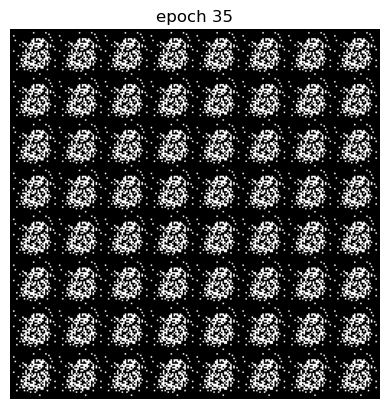

Epoch 35 of 100
Generator loss: 22.29259688, Discriminator loss: 0.00000044


118it [00:50,  2.32it/s]                                                           


Epoch 36 of 100
Generator loss: 22.49684976, Discriminator loss: 0.00000041


118it [00:51,  2.29it/s]                                                           


Epoch 37 of 100
Generator loss: 22.57677846, Discriminator loss: 0.00000031


118it [00:50,  2.33it/s]                                                           


Epoch 38 of 100
Generator loss: 22.68387379, Discriminator loss: 0.00000037


118it [00:49,  2.40it/s]                                                           


Epoch 39 of 100
Generator loss: 22.85030329, Discriminator loss: 0.00000033


118it [00:51,  2.31it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


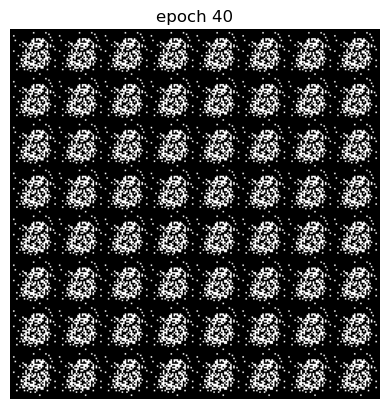

Epoch 40 of 100
Generator loss: 22.95707057, Discriminator loss: 0.00000031


118it [00:52,  2.26it/s]                                                           


Epoch 41 of 100
Generator loss: 23.07427861, Discriminator loss: 0.00000034


118it [00:43,  2.71it/s]                                                           


Epoch 42 of 100
Generator loss: 23.15037687, Discriminator loss: 0.00000028


118it [00:40,  2.94it/s]                                                           


Epoch 43 of 100
Generator loss: 23.25824413, Discriminator loss: 0.00000029


118it [00:38,  3.06it/s]                                                           


Epoch 44 of 100
Generator loss: 23.33192005, Discriminator loss: 0.00000031


118it [00:37,  3.15it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


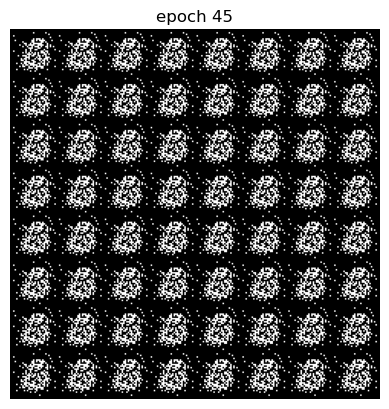

Epoch 45 of 100
Generator loss: 23.37576124, Discriminator loss: 0.00000028


118it [00:37,  3.17it/s]                                                           


Epoch 46 of 100
Generator loss: 20.82004897, Discriminator loss: 0.00012641


118it [00:37,  3.14it/s]                                                           


Epoch 47 of 100
Generator loss: 34.38821104, Discriminator loss: 0.00003908


118it [00:38,  3.06it/s]                                                           


Epoch 48 of 100
Generator loss: 37.16703881, Discriminator loss: 0.00000091


118it [00:40,  2.89it/s]                                                           


Epoch 49 of 100
Generator loss: 36.59620432, Discriminator loss: 0.00000135


118it [00:37,  3.18it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


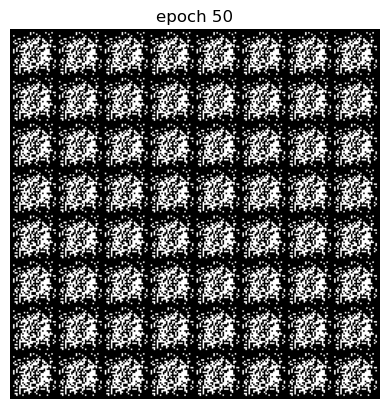

Epoch 50 of 100
Generator loss: 36.21919117, Discriminator loss: 0.00000067


118it [00:40,  2.92it/s]                                                           


Epoch 51 of 100
Generator loss: 35.92442579, Discriminator loss: 0.00000058


118it [00:38,  3.07it/s]                                                           


Epoch 52 of 100
Generator loss: 35.81006743, Discriminator loss: 0.00000045


118it [00:39,  3.02it/s]                                                           


Epoch 53 of 100
Generator loss: 35.56398640, Discriminator loss: 0.00000054


118it [00:45,  2.60it/s]                                                           


Epoch 54 of 100
Generator loss: 35.47339135, Discriminator loss: 0.00000042


118it [00:39,  3.00it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


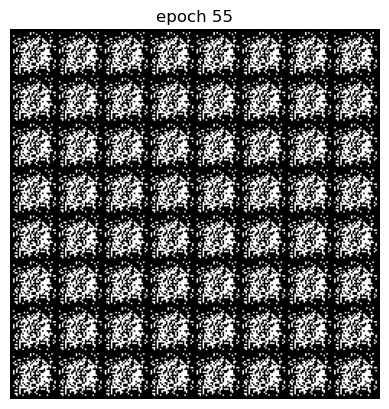

Epoch 55 of 100
Generator loss: 35.31996963, Discriminator loss: 0.00000025


118it [00:42,  2.78it/s]                                                           


Epoch 56 of 100
Generator loss: 35.26839352, Discriminator loss: 0.00000017


118it [00:41,  2.87it/s]                                                           


Epoch 57 of 100
Generator loss: 34.66319431, Discriminator loss: 0.00000017


118it [00:38,  3.04it/s]                                                           


Epoch 58 of 100
Generator loss: 34.34249271, Discriminator loss: 0.00000041


118it [00:38,  3.09it/s]                                                           


Epoch 59 of 100
Generator loss: 34.14094974, Discriminator loss: 0.00000026


118it [00:35,  3.34it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


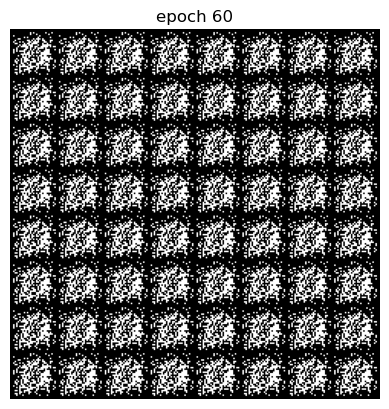

Epoch 60 of 100
Generator loss: 33.76448639, Discriminator loss: 0.00000020


118it [00:40,  2.94it/s]                                                           


Epoch 61 of 100
Generator loss: 33.42876927, Discriminator loss: 0.00000013


118it [00:38,  3.06it/s]                                                           


Epoch 62 of 100
Generator loss: 33.30468647, Discriminator loss: 0.00000015


118it [00:39,  3.01it/s]                                                           


Epoch 63 of 100
Generator loss: 33.24603226, Discriminator loss: 0.00000011


118it [00:38,  3.08it/s]                                                           


Epoch 64 of 100
Generator loss: 33.21689606, Discriminator loss: 0.00000012


118it [00:40,  2.95it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


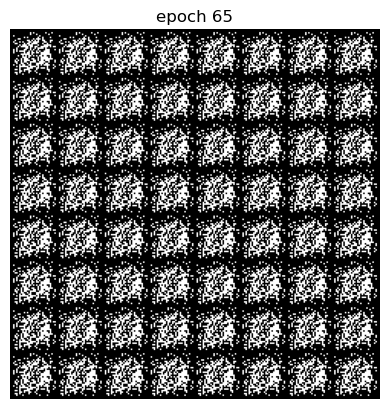

Epoch 65 of 100
Generator loss: 33.15889098, Discriminator loss: 0.00000013


118it [00:40,  2.91it/s]                                                           


Epoch 66 of 100
Generator loss: 33.12106516, Discriminator loss: 0.00000012


118it [00:39,  3.01it/s]                                                           


Epoch 67 of 100
Generator loss: 33.10441404, Discriminator loss: 0.00000012


118it [00:36,  3.24it/s]                                                           


Epoch 68 of 100
Generator loss: 32.90902407, Discriminator loss: 0.00000010


118it [00:39,  2.99it/s]                                                           


Epoch 69 of 100
Generator loss: 32.78837660, Discriminator loss: 0.00000010


118it [00:38,  3.06it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


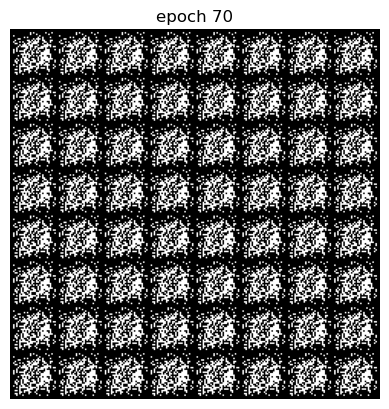

Epoch 70 of 100
Generator loss: 32.76694066, Discriminator loss: 0.00000007


118it [00:36,  3.25it/s]                                                           


Epoch 71 of 100
Generator loss: 32.67500535, Discriminator loss: 0.00000008


118it [00:40,  2.90it/s]                                                           


Epoch 72 of 100
Generator loss: 32.62388306, Discriminator loss: 0.00000007


118it [00:38,  3.03it/s]                                                           


Epoch 73 of 100
Generator loss: 32.62337611, Discriminator loss: 0.00000006


118it [00:37,  3.19it/s]                                                           


Epoch 74 of 100
Generator loss: 32.59085818, Discriminator loss: 0.00000006


118it [00:39,  2.98it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


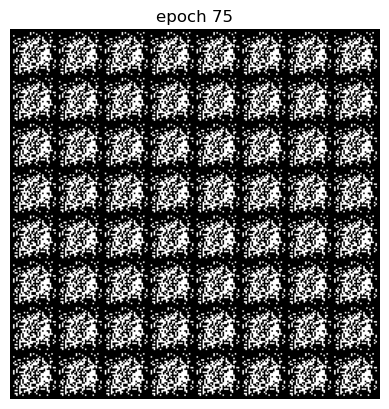

Epoch 75 of 100
Generator loss: 32.52557226, Discriminator loss: 0.00000006


118it [00:37,  3.16it/s]                                                           


Epoch 76 of 100
Generator loss: 32.50364129, Discriminator loss: 0.00000006


118it [00:35,  3.31it/s]                                                           


Epoch 77 of 100
Generator loss: 32.44555578, Discriminator loss: 0.00000004


118it [00:36,  3.26it/s]                                                           


Epoch 78 of 100
Generator loss: 32.38733155, Discriminator loss: 0.00000007


118it [00:36,  3.25it/s]                                                           


Epoch 79 of 100
Generator loss: 32.36880025, Discriminator loss: 0.00000005


118it [00:38,  3.05it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


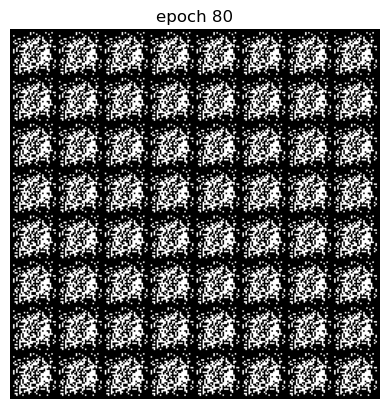

Epoch 80 of 100
Generator loss: 32.32556429, Discriminator loss: 0.00000005


118it [00:37,  3.15it/s]                                                           


Epoch 81 of 100
Generator loss: 32.27710073, Discriminator loss: 0.00000005


118it [00:37,  3.11it/s]                                                           


Epoch 82 of 100
Generator loss: 32.24126066, Discriminator loss: 0.00000005


118it [00:39,  3.01it/s]                                                           


Epoch 83 of 100
Generator loss: 32.17602671, Discriminator loss: 0.00000003


118it [00:35,  3.29it/s]                                                           


Epoch 84 of 100
Generator loss: 32.09753770, Discriminator loss: 0.00000003


118it [00:35,  3.31it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


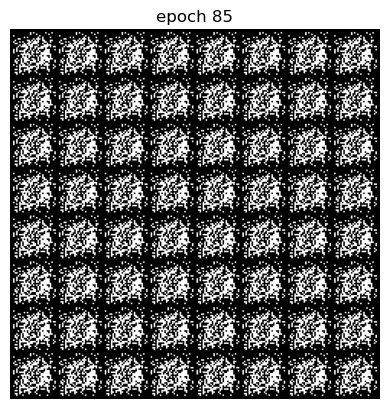

Epoch 85 of 100
Generator loss: 32.07158783, Discriminator loss: 0.00000004


118it [00:40,  2.94it/s]                                                           


Epoch 86 of 100
Generator loss: 31.17088561, Discriminator loss: 0.00000004


118it [00:42,  2.79it/s]                                                           


Epoch 87 of 100
Generator loss: 70.49680229, Discriminator loss: 0.00001576


118it [00:41,  2.87it/s]                                                           


Epoch 88 of 100
Generator loss: 72.87915991, Discriminator loss: 0.00000024


118it [00:40,  2.92it/s]                                                           


Epoch 89 of 100
Generator loss: 72.49707553, Discriminator loss: 0.00000004


118it [00:39,  2.99it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


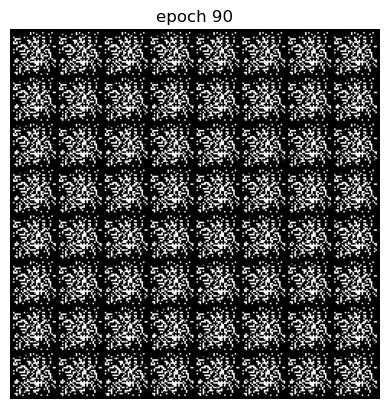

Epoch 90 of 100
Generator loss: 72.40265832, Discriminator loss: 0.00000003


118it [00:33,  3.51it/s]                                                           


Epoch 91 of 100
Generator loss: 72.40631345, Discriminator loss: 0.00000003


118it [00:35,  3.29it/s]                                                           


Epoch 92 of 100
Generator loss: 72.30884422, Discriminator loss: 0.00000009


118it [00:36,  3.20it/s]                                                           


Epoch 93 of 100
Generator loss: 71.95573882, Discriminator loss: 0.00000003


118it [00:35,  3.30it/s]                                                           


Epoch 94 of 100
Generator loss: 71.88306981, Discriminator loss: 0.00000002


118it [00:36,  3.24it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


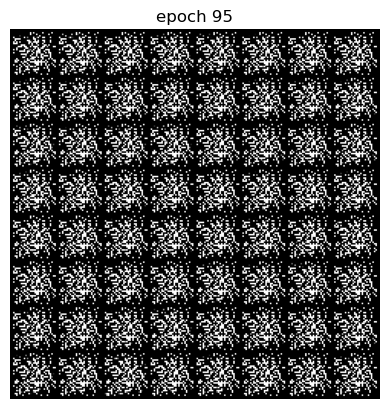

Epoch 95 of 100
Generator loss: 71.84973634, Discriminator loss: 0.00000003


118it [00:36,  3.21it/s]                                                           


Epoch 96 of 100
Generator loss: 71.71634518, Discriminator loss: 0.00000004


118it [01:32,  1.28it/s]                                                           


Epoch 97 of 100
Generator loss: 71.56878388, Discriminator loss: 0.00000001


118it [00:39,  2.97it/s]                                                           


Epoch 98 of 100
Generator loss: 71.51424154, Discriminator loss: 0.00000002


118it [00:50,  2.35it/s]                                                           


Epoch 99 of 100
Generator loss: 71.55025143, Discriminator loss: 0.00000001


118it [00:39,  3.02it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


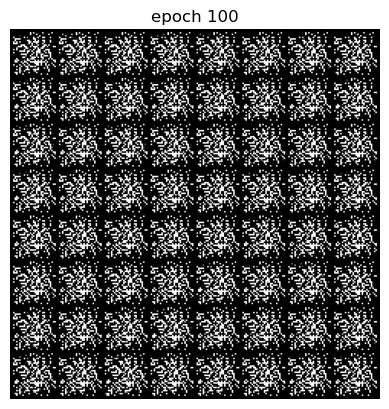

Epoch 100 of 100
Generator loss: 71.57750376, Discriminator loss: 0.00000001


In [53]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    

    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        # print(bi, len(data[0]))
        real_labels = label_real(len(data[0]))
        fake_labels = label_fake(len(data[0]))
        
        z = create_noise(len(data[0]), nz)
        
        real_images = data[0].to(device)
        generated_images = generator(z)
        
        generator.zero_grad()
        g_loss = generator_loss(discriminator(generated_images), real_labels)
        loss_g += g_loss.item()
        g_loss.backward()
        optim_g.step()
        
        discriminator.zero_grad()
        d_loss_real = criterion(discriminator(real_images), real_labels)
        d_loss_fake = criterion(discriminator(generated_images.detach()), fake_labels)
        d_loss = d_loss_real + d_loss_fake
        loss_d += d_loss.item()
        d_loss.backward()
        optim_d.step()
        
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [54]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [55]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

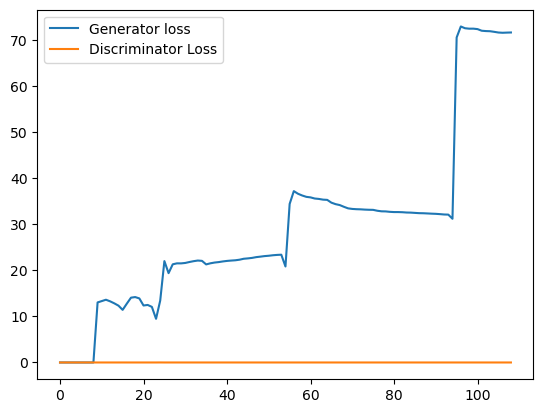

In [56]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')